<a href="https://colab.research.google.com/github/hrmt2k/Panorama/blob/main/Panorama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <font style="color:rgb(8,133,37)">Code</font>


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [8]:
MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15

In [21]:
# Read reference image
imageFile1 = "room1.jpeg"
print("Reading First image : ", imageFile1)
im1 = cv2.imread(imageFile1, cv2.IMREAD_COLOR)

Reading First image :  room1.jpeg


In [22]:
# Read image to be aligned
imageFile2 = "room2.jpeg"
print("Reading Second Image : ", imageFile2);
im2 = cv2.imread(imageFile2, cv2.IMREAD_COLOR)

Reading Second Image :  room2.jpeg


In [11]:
# Convert images to grayscale
im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

# Detect ORB features and compute descriptors.
orb = cv2.ORB_create(MAX_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)

In [23]:
im1Keypoints = np.array([])
im1Keypoints = cv2.drawKeypoints(im1, keypoints1, im1Keypoints, color=(0,0,255),flags=0)
print("Saving Image with Keypoints")
cv2.imwrite("keypoints.jpg", im1Keypoints)

Saving Image with Keypoints


True

Text(0.5, 1.0, 'Keypoints obtained from the ORB detector')

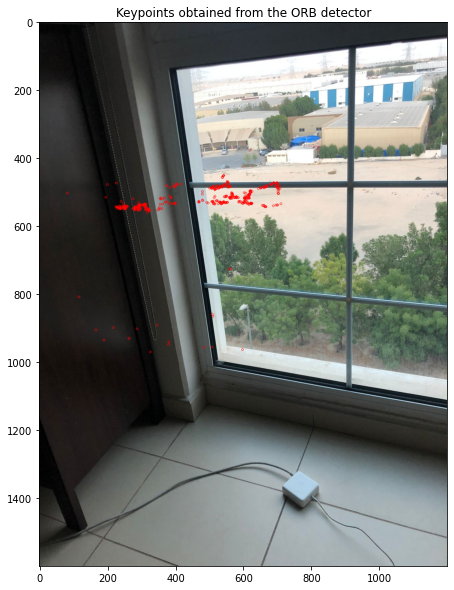

In [24]:
plt.imshow(im1Keypoints[:,:,::-1])
plt.title("Keypoints obtained from the ORB detector")

## <font style="color:rgb(50,120,229)">Step 2 : Find matching corresponding points</font>


In [25]:
# Match features.
matcher = cv2.DescriptorMatcher_create(
                cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2, None)

# Sort matches by score
matches.sort(key=lambda x: x.distance, reverse=False)

# Remove not so good matches
numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
matches = matches[:numGoodMatches]

# Draw top matches
imMatches = cv2.drawMatches(im1, keypoints1,
                            im2, keypoints2, 
                            matches, None)

Text(0.5, 1.0, 'Matchings obtained from the descriptor matcher')

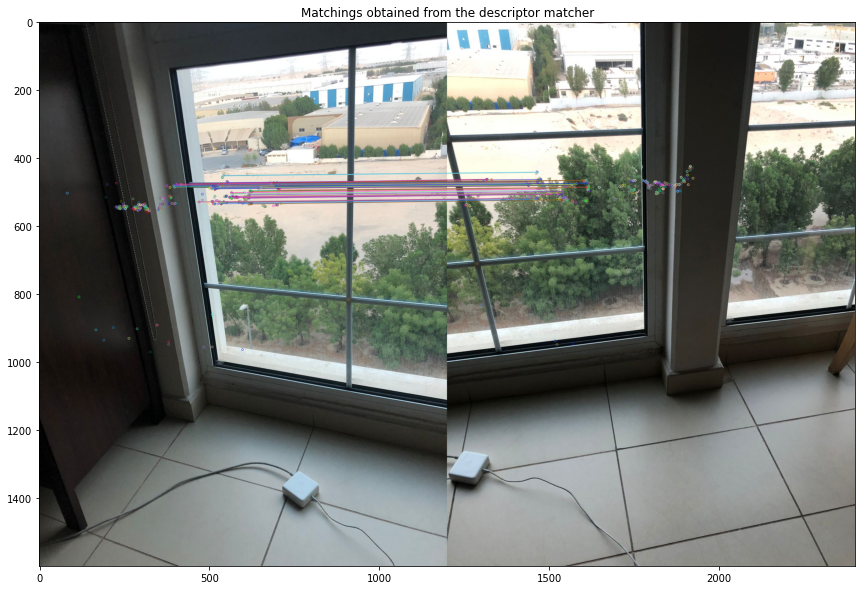

In [26]:
plt.figure(figsize=[15,10])
plt.imshow(imMatches[:,:,::-1])
plt.title("Matchings obtained from the descriptor matcher")

## <font style="color:rgb(50,120,229)">Step 3 : Image Alignment using Homography</font>



In [27]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)
print("Homograhy matrix \n{}".format(h))

Homograhy matrix 
[[ 6.25885529e-01 -5.54054223e-02  3.17167227e+02]
 [-2.10113312e-01  8.03185133e-01  8.18734558e+01]
 [-4.04498811e-04 -1.11334866e-04  1.00000000e+00]]


## <font style="color:rgb(50,120,229)">Step 4 : Warp Image</font>


In [28]:
# Use homography
im1Height, im1Width, channels = im1.shape
im2Height, im2Width, channels = im2.shape

im2Aligned = cv2.warpPerspective(im2, h, 
                            (im2Width + im1Width, im2Height))

Text(0.5, 1.0, 'Second image aligned to first image obtained using homography and warping')

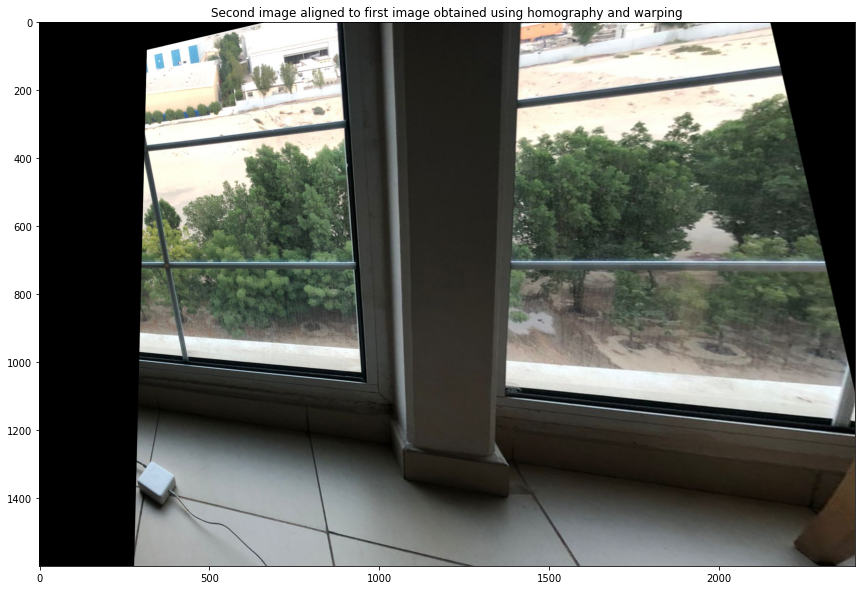

In [29]:
plt.figure(figsize=[15,10])
plt.imshow(im2Aligned[:,:,::-1])
plt.title("Second image aligned to first image obtained using homography and warping")

## <font style="color:rgb(50,120,229)">Step 5 : Stitch Images</font>


In [30]:
# Stitch Image 1 with aligned image 2
stitchedImage = np.copy(im2Aligned)
stitchedImage[0:im1Height,0:im1Width] = im1

Text(0.5, 1.0, 'Final Stitched Image')

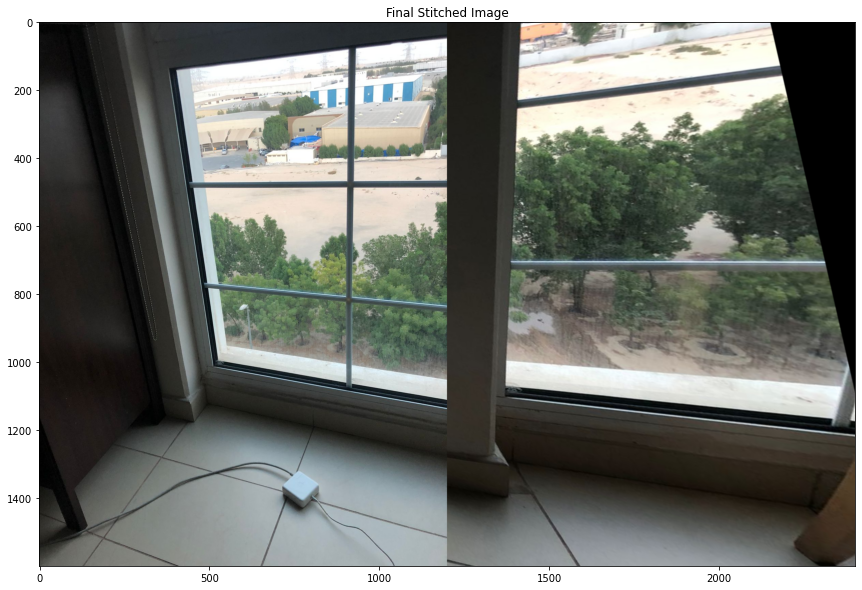

In [31]:
plt.figure(figsize=[15,10])
plt.imshow(stitchedImage[:,:,::-1])
plt.title("Final Stitched Image")